In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [2]:
data = pd.read_json("game_data/tournament-353230.jsonl", lines=True)
data

,id,game
0,f209c2f3058af9036013f75be84f7d567355e64fbfcfd0...,"[{'move_num': 9, 'turn': '<w>', 'seq_in': '<w>..."
1,865912c9746b056e24c88a946fac6a0080fea100b1eabe...,"[{'move_num': 9, 'turn': '<w>', 'seq_in': '<w>..."
2,d076929606683dff7b7242f7bc708034c17836fe28d610...,"[{'move_num': 9, 'turn': '<w>', 'seq_in': '<w>..."
3,1def2296f9ffb65adea68b087e4e471f7a1686b89e6683...,"[{'move_num': 9, 'turn': '<w>', 'seq_in': '<w>..."
4,8a55bc11d5126914b2dcddff5a084147438fc8c58283cc...,"[{'move_num': 9, 'turn': '<w>', 'seq_in': '<w>..."
...,...,...
131,614e6ad7e0a94d384e39b26100a9bbde0398fd8dab652d...,"[{'move_num': 9, 'turn': '<w>', 'seq_in': '<w>..."
132,417d85e0a5bfd9bd613364fcb6e7be04b4dad12ef09178...,"[{'move_num': 9, 'turn': '<w>', 'seq_in': '<w>..."
133,f54534ce6163cfb60a716c3e22ffaf392af90dbc13329c...,"[{'move_num': 9, 'turn': '<w>', 'seq_in': '<w>..."
134,4930d8ba8d12326fddb3fa1882f6e5083b9a2c5d7ad1e5...,"[{'move_num': 9, 'turn': '<w>', 'seq_in': '<w>..."


In [3]:
data = data.explode('game')
data

,id,game
0,f209c2f3058af9036013f75be84f7d567355e64fbfcfd0...,"{'move_num': 9, 'turn': '<w>', 'seq_in': '<w>d..."
0,f209c2f3058af9036013f75be84f7d567355e64fbfcfd0...,"{'move_num': 9, 'turn': '<b>', 'seq_in': '<w>d..."
0,f209c2f3058af9036013f75be84f7d567355e64fbfcfd0...,"{'move_num': 10, 'turn': '<w>', 'seq_in': '<w>..."
0,f209c2f3058af9036013f75be84f7d567355e64fbfcfd0...,"{'move_num': 10, 'turn': '<b>', 'seq_in': '<w>..."
0,f209c2f3058af9036013f75be84f7d567355e64fbfcfd0...,"{'move_num': 11, 'turn': '<w>', 'seq_in': '<w>..."
...,...,...
135,272845660627229bd9a926ab6f3bea97467f0b8051d106...,"{'move_num': 82, 'turn': '<w>', 'seq_in': '<w>..."
135,272845660627229bd9a926ab6f3bea97467f0b8051d106...,"{'move_num': 82, 'turn': '<b>', 'seq_in': '<w>..."
135,272845660627229bd9a926ab6f3bea97467f0b8051d106...,"{'move_num': 83, 'turn': '<w>', 'seq_in': '<w>..."
135,272845660627229bd9a926ab6f3bea97467f0b8051d106...,"{'move_num': 83, 'turn': '<b>', 'seq_in': '<w>..."


In [4]:
data.game.reset_index(drop=True)

0        {'move_num': 9, 'turn': '<w>', 'seq_in': '<w>d...
1        {'move_num': 9, 'turn': '<b>', 'seq_in': '<w>d...
2        {'move_num': 10, 'turn': '<w>', 'seq_in': '<w>...
3        {'move_num': 10, 'turn': '<b>', 'seq_in': '<w>...
4        {'move_num': 11, 'turn': '<w>', 'seq_in': '<w>...
                               ...                        
20071    {'move_num': 82, 'turn': '<w>', 'seq_in': '<w>...
20072    {'move_num': 82, 'turn': '<b>', 'seq_in': '<w>...
20073    {'move_num': 83, 'turn': '<w>', 'seq_in': '<w>...
20074    {'move_num': 83, 'turn': '<b>', 'seq_in': '<w>...
20075    {'move_num': 84, 'turn': '<w>', 'seq_in': '<w>...
Name: game, Length: 20076, dtype: object

In [5]:
lines = data.drop('game', axis=1).reset_index(drop=True).join(pd.DataFrame.from_dict(data.game.reset_index(drop=True).to_dict(), orient='index'))
lines

,id,move_num,turn,seq_in,seq_out,eval
0,f209c2f3058af9036013f75be84f7d567355e64fbfcfd0...,9,<w>,<w>d2-d4<b>Ng8-f6<w>c2-c4<b>g7-g6<w>Nb1-c3<b>B...,f2-f4<b>Ne5-d7<w>d5xe6<b>f7xe6<w>Ng1-f3<b>h7-h...,0.52
1,f209c2f3058af9036013f75be84f7d567355e64fbfcfd0...,9,<b>,<w>d2-d4<b>Ng8-f6<w>c2-c4<b>g7-g6<w>Nb1-c3<b>B...,Ne5-d7<w>d5xe6<b>f7xe6<w>Ng1-f3,0.52
2,f209c2f3058af9036013f75be84f7d567355e64fbfcfd0...,10,<w>,<w>d2-d4<b>Ng8-f6<w>c2-c4<b>g7-g6<w>Nb1-c3<b>B...,d5xe6<b>f7xe6<w>Ng1-f3<b>h7-h6<w>Bg5-h4<b>e6-e...,0.46
3,f209c2f3058af9036013f75be84f7d567355e64fbfcfd0...,10,<b>,<w>d2-d4<b>Ng8-f6<w>c2-c4<b>g7-g6<w>Nb1-c3<b>B...,f7xe6,0.55
4,f209c2f3058af9036013f75be84f7d567355e64fbfcfd0...,11,<w>,<w>d2-d4<b>Ng8-f6<w>c2-c4<b>g7-g6<w>Nb1-c3<b>B...,Ng1-f3<b>h7-h6<w>Bg5-h4<b>e6-e5<w>f4xe5<b>d6xe...,0.39
...,...,...,...,...,...,...
20071,272845660627229bd9a926ab6f3bea97467f0b8051d106...,82,<w>,<w>e2-e4<b>c7-c5<w>Ng1-f3<b>g7-g6<w>d2-d4<b>Bf...,Kf4-g3<b>Kg1-f1<w>Nh4-g2<b>Kf1-g1<w>Re4-e1#,M5
20072,272845660627229bd9a926ab6f3bea97467f0b8051d106...,82,<b>,<w>e2-e4<b>c7-c5<w>Ng1-f3<b>g7-g6<w>d2-d4<b>Bf...,Kg1-f1<w>Nh4-f5<b>Kf1-g1<w>Re4-e1#,M4
20073,272845660627229bd9a926ab6f3bea97467f0b8051d106...,83,<w>,<w>e2-e4<b>c7-c5<w>Ng1-f3<b>g7-g6<w>d2-d4<b>Bf...,Re4-e7<b>Kf1-g1<w>Re7-e1#,M3
20074,272845660627229bd9a926ab6f3bea97467f0b8051d106...,83,<b>,<w>e2-e4<b>c7-c5<w>Ng1-f3<b>g7-g6<w>d2-d4<b>Bf...,Kf1-g1<w>Re7-e1#,M2


In [6]:
def scale_eval(ev):
    if ev is None:
        return np.NaN
    elif "-M" in ev:
        return 0
    elif "M" in ev:
        return 1
    else:
        ev = re.findall(r"[-+]?(?:\d*\.*\d+)", ev)[0]
        ev = float(ev)
        return 1 / (1 + np.exp(-ev))

In [7]:
lines['eval_str'] = lines['eval']
lines['eval'] = lines['eval'].map(scale_eval)

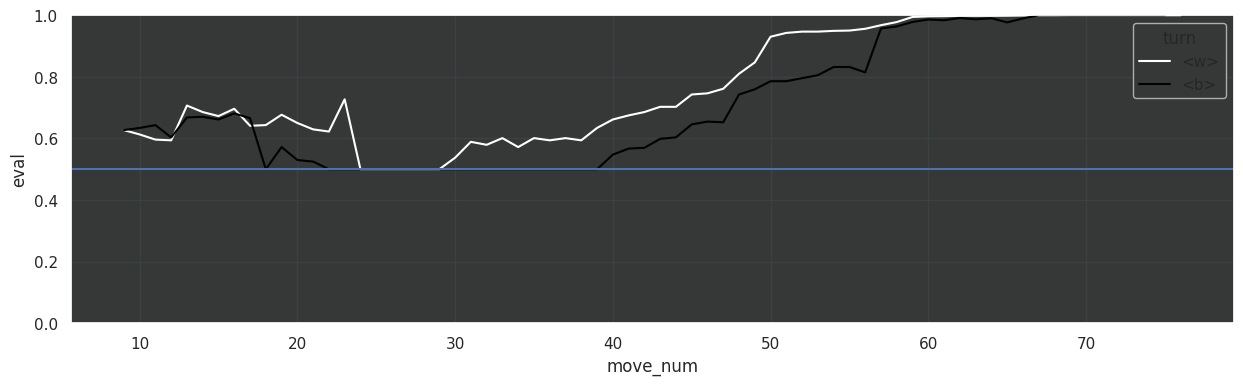

In [18]:
df = lines[lines.id == lines.loc[0, 'id']]
sns.set(rc={'axes.facecolor':'#363737', "grid.color":'#3c4142', "figure.figsize":(15, 4)})
sns.lineplot(df, x='move_num', y='eval', hue='turn', palette=['white', 'black'])
plt.ylim(top=1, bottom=0)
plt.axhline(y=0.5)

(0.0, 1.0)

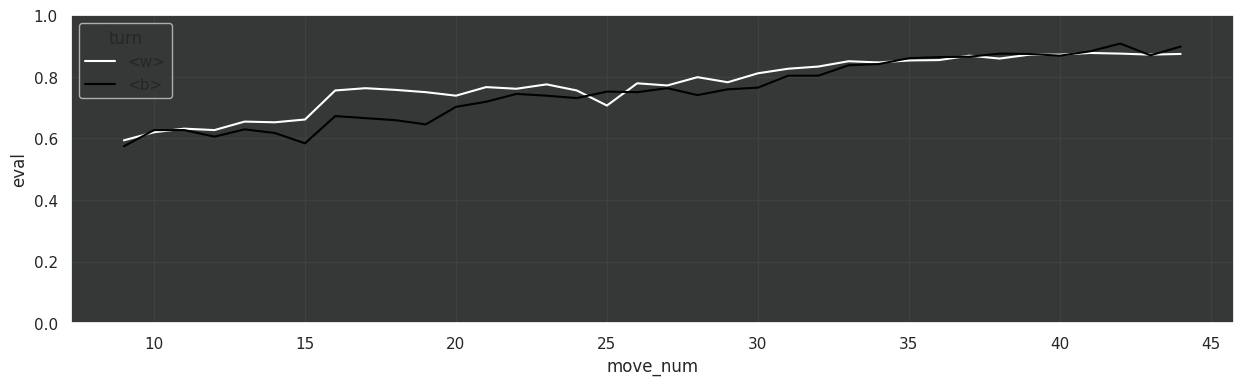

In [9]:
df = lines[lines.id == lines['id'].unique()[1]]
sns.set(rc={'axes.facecolor':'#363737', "grid.color":'#3c4142', "figure.figsize":(15, 4)})
sns.lineplot(df, x='move_num', y='eval', hue='turn', palette=['white', 'black'])
plt.ylim(top=1, bottom=0)

(0.0, 1.0)

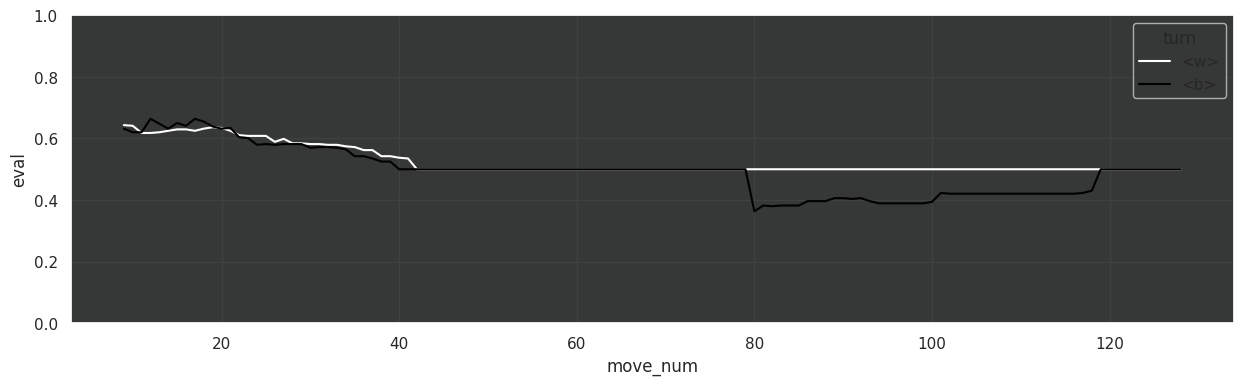

In [10]:
df = lines[lines.id == lines['id'].unique()[2]]
sns.set(rc={'axes.facecolor':'#363737', "grid.color":'#3c4142', "figure.figsize":(15, 4)})
sns.lineplot(df, x='move_num', y='eval', hue='turn', palette=['white', 'black'])
plt.ylim(top=1, bottom=0)

(0.0, 1.0)

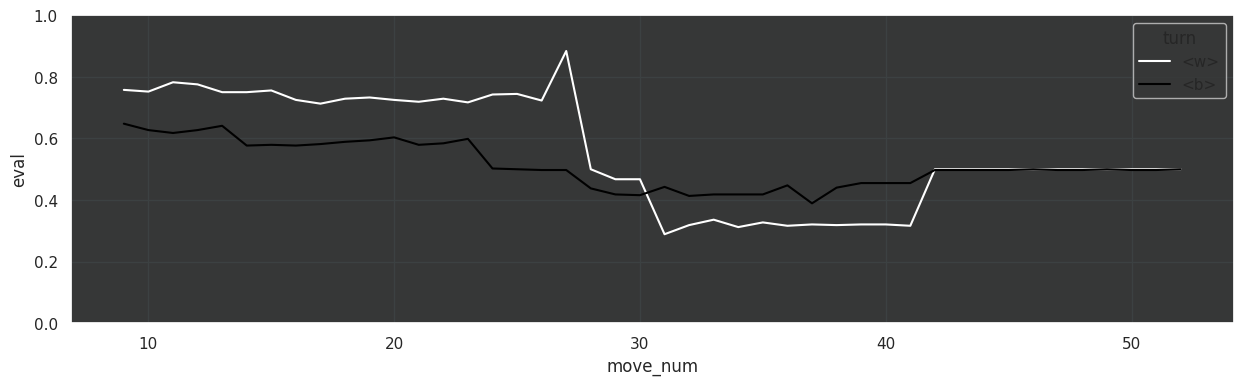

In [11]:
df = lines[lines.id == lines['id'].unique()[5]]
sns.set(rc={'axes.facecolor':'#363737', "grid.color":'#3c4142', "figure.figsize":(15, 4)})
sns.lineplot(df, x='move_num', y='eval', hue='turn', palette=['white', 'black'])
plt.ylim(top=1, bottom=0)

(0.0, 1.0)

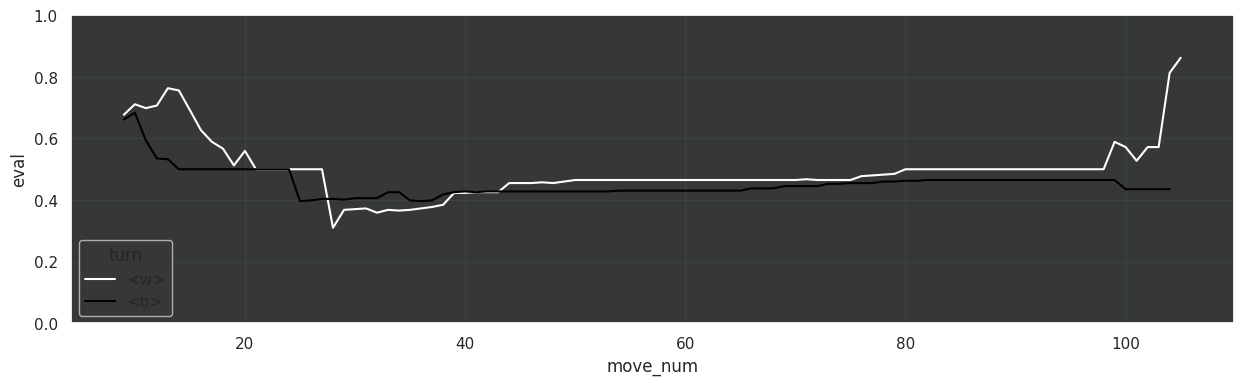

In [12]:
df = lines[lines.id == lines['id'].unique()[6]]
sns.set(rc={'axes.facecolor':'#363737', "grid.color":'#3c4142', "figure.figsize":(15, 4)})
sns.lineplot(df, x='move_num', y='eval', hue='turn', palette=['white', 'black'])
plt.ylim(top=1, bottom=0)

(0.0, 1.0)

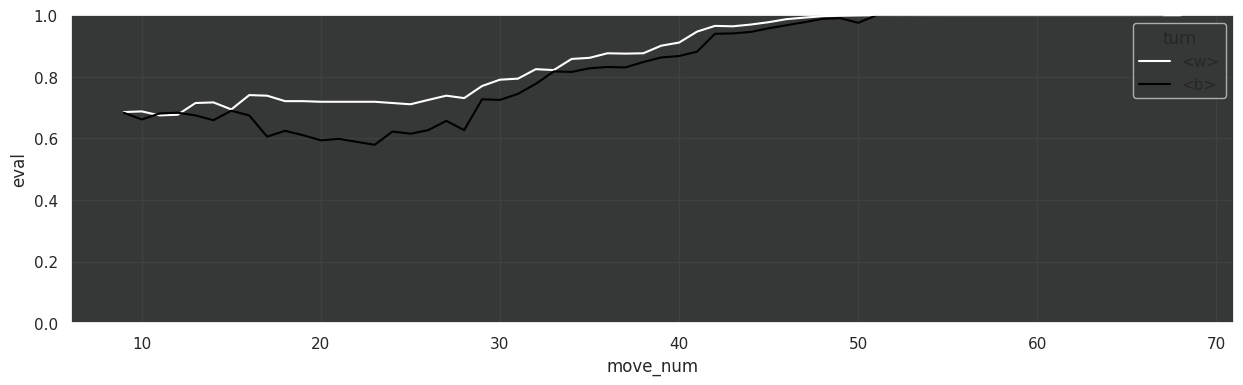

In [13]:
df = lines[lines.id == lines['id'].unique()[7]]
sns.set(rc={'axes.facecolor':'#363737', "grid.color":'#3c4142', "figure.figsize":(15, 4)})
sns.lineplot(df, x='move_num', y='eval', hue='turn', palette=['white', 'black'])
plt.ylim(top=1, bottom=0)

(0.0, 1.0)

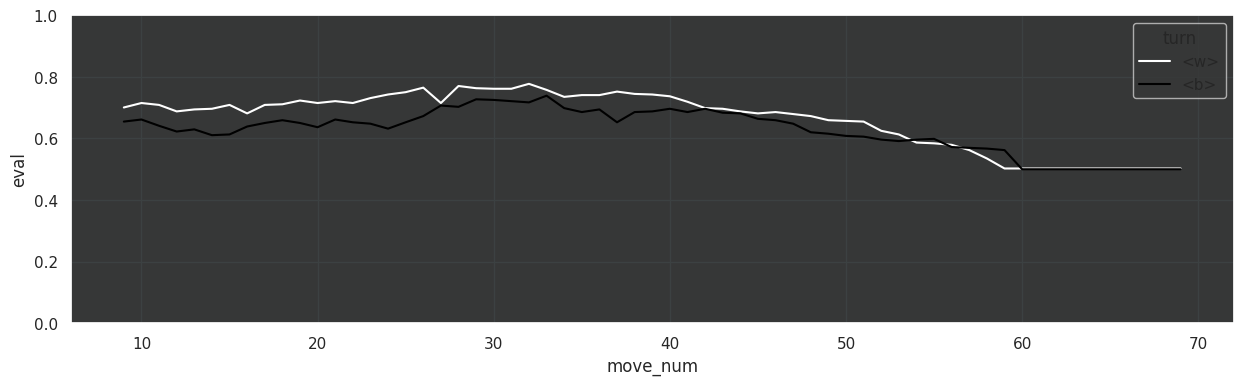

In [14]:
df = lines[lines.id == lines['id'].unique()[8]]
sns.set(rc={'axes.facecolor':'#363737', "grid.color":'#3c4142', "figure.figsize":(15, 4)})
sns.lineplot(df, x='move_num', y='eval', hue='turn', palette=['white', 'black'])
plt.ylim(top=1, bottom=0)

(0.0, 1.0)

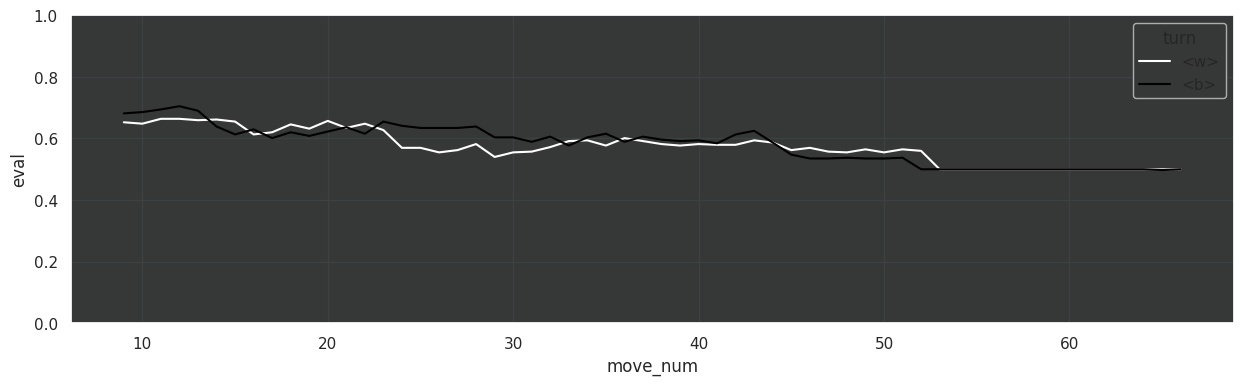

In [19]:
df = lines[lines.id == lines['id'].unique()[9]]
sns.set(rc={'axes.facecolor':'#363737', "grid.color":'#3c4142', "figure.figsize":(15, 4)})
sns.lineplot(df, x='move_num', y='eval', hue='turn', palette=['white', 'black'])
plt.ylim(top=1, bottom=0)

(0.0, 1.0)

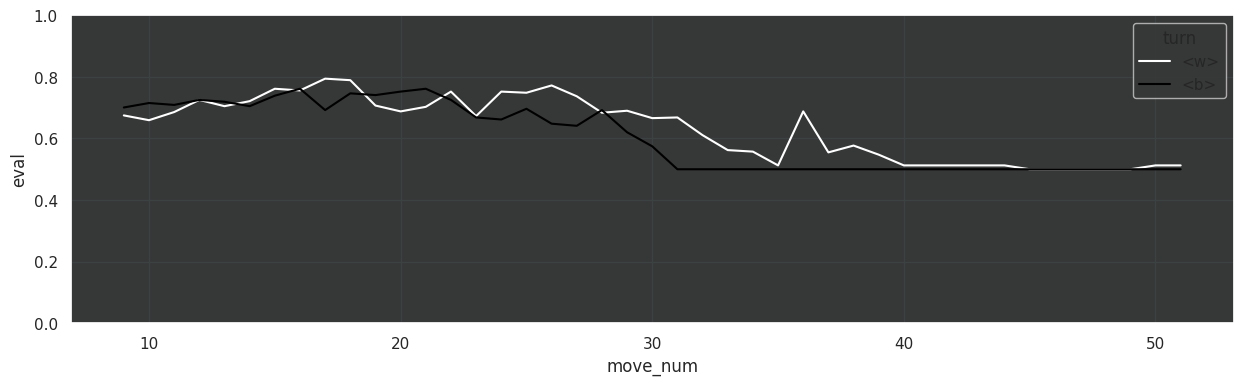

In [20]:
df = lines[lines.id == lines['id'].unique()[10]]
sns.set(rc={'axes.facecolor':'#363737', "grid.color":'#3c4142', "figure.figsize":(15, 4)})
sns.lineplot(df, x='move_num', y='eval', hue='turn', palette=['white', 'black'])
plt.ylim(top=1, bottom=0)